In [1]:
import edgar 
import pandas as pd
import requests
import yfinance as yf
import pandas as pd
import numpy as np
from finstmt import IncomeStatements, BalanceSheets, FinancialStatements
import statsmodels.api as sm
import numpy_financial as npf
import finpie as fp
from pandas_datareader import data
import pandas_datareader as web



In [2]:
ticker= 'MSFT'
selectedcompany = 'MICROSOFT CORP' #find company's registered name https://www.sec.gov/edgar/searchedgar/companysearch.html
year=('2021','2019')

In [3]:
url_list=[]
df_list=[]

for y in year:
    selectedreport = '10-K'
    dirc= 'C:\\Users\\Omar\\OneDrive\\Desktop\\Algo\\'
    quarters = (dirc+y+'-QTR1.tsv',  dirc+y+'-QTR2.tsv',  dirc+y+'-QTR3.tsv',dirc+y+'-QTR4.tsv')
    filings = []
    for q in quarters:
        print(q)
        csv=pd.read_csv(q, sep='\t', lineterminator='\n', names= None)
        csv.columns.values[0] = 'item'
        companyreport= csv[((csv['item'].str.contains(selectedcompany))& csv['item'].str.contains(selectedreport))]
        filing = companyreport['item'].str.split('|')
        filing = filing.to_list()
        print(filing)
        filings.append(filing)
    filings = [x for x in filings if x != []]
    filings[0][0]
    for item in filings[0][0]:
        if 'html' in item:
            report = item
    report = report.replace('\r','')
    print(report)

    url = 'https://www.sec.gov/Archives/'+report
    header = {
      "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
      "X-Requested-With": "XMLHttpRequest"
    }

    r = requests.get(url, headers=header)

    df = pd.read_html(r.text)
    document_index = df[0]
    document_index = document_index.dropna()
    document_name = document_index[document_index['Description'].str.contains(selectedreport)]
    document_name = document_name['Document'].str.split(' ')
    document_name = document_name[0][0]
    document_name
    report_formatted = report.replace('-','').replace('index.html','')
    url = 'https://www.sec.gov/Archives/'+report_formatted+'/'+document_name
    url_list.append(url)
    r = requests.get(url, headers=header)
    df = pd.read_html(r.content) 
    df_list.append(df)

C:\Users\Omar\OneDrive\Desktop\Algo\2021-QTR1.tsv
[]
C:\Users\Omar\OneDrive\Desktop\Algo\2021-QTR2.tsv
[]
C:\Users\Omar\OneDrive\Desktop\Algo\2021-QTR3.tsv
[['789019', 'MICROSOFT CORP', '10-K', '2021-07-29', 'edgar/data/789019/0001564590-21-039151.txt', 'edgar/data/789019/0001564590-21-039151-index.html\r']]
C:\Users\Omar\OneDrive\Desktop\Algo\2021-QTR4.tsv
[]
edgar/data/789019/0001564590-21-039151-index.html
C:\Users\Omar\OneDrive\Desktop\Algo\2019-QTR1.tsv
[]
C:\Users\Omar\OneDrive\Desktop\Algo\2019-QTR2.tsv
[]
C:\Users\Omar\OneDrive\Desktop\Algo\2019-QTR3.tsv
[['789019', 'MICROSOFT CORP', '10-K', '2019-08-01', 'edgar/data/789019/0001564590-19-027952.txt', 'edgar/data/789019/0001564590-19-027952-index.html\r']]
C:\Users\Omar\OneDrive\Desktop\Algo\2019-QTR4.tsv
[]
edgar/data/789019/0001564590-19-027952-index.html


In [4]:
print(year[0],selectedcompany,selectedreport,url_list[0])
print(year[1],selectedcompany,selectedreport,url_list[1])

2021 MICROSOFT CORP 10-K https://www.sec.gov/Archives/edgar/data/789019/000156459021039151/msft-10k_20210630.htm
2019 MICROSOFT CORP 10-K https://www.sec.gov/Archives/edgar/data/789019/000156459019027952/msft-10k_20190630.htm


In [5]:
# Income statement for first period

INC_1LI=[]
INC_2LI=[]
INC_3LI=[]

for item_inc in df_list[0]:
    INC_1= item_inc[0].astype(str).str.contains('Income before income taxes')
    INC_2= item_inc[0].astype(str).str.contains('Cost of revenue')
    INC_3= item_inc[0].astype(str).str.contains('Operating income')
    INC_1LI.append(INC_1.any())
    INC_2LI.append(INC_2.any())
    INC_3LI.append(INC_3.any())    

    
dict = {'INC_1': INC_1LI, 'INC_2': INC_2LI, 'INC_3': INC_3LI} 
df = pd.DataFrame(dict)
inc=df.loc[(df['INC_1'] == True) & (df['INC_2'] == True) & (df['INC_3'] == True)]

Income_sheet_1=df_list[0][inc.index[0]]
display(Income_sheet_1)

# find date row
date_list=[]
for i in Income_sheet_1.index:
    date=Income_sheet_1.loc[i,:].astype(str).str.contains('2021')
    date_list.append(date.any())
df_date = pd.DataFrame(date_list)
date=df_date.loc[(df_date[0] == True)]
date=int(date.index[0])

# find potential year1 column
year1_list=[]
dollar_list=[]
nan_list=[]
digit_list=[]
dict = {'Year1': year1_list, 'Dollar': dollar_list, 'brackets':nan_list, 'digits': digit_list} 
for i in Income_sheet_1:
    year1=Income_sheet_1[i].astype(str).str.contains('2021')
    dollar=Income_sheet_1[i].astype(str).str.contains("\$")
    nan=Income_sheet_1[i].astype(str).str.contains(r"\)")
    digit=Income_sheet_1[i].astype(str).str.contains(r'\B\)')

    year1_list.append(year1.any())
    dollar_list.append(dollar.any())
    nan_list.append(nan.any())
    digit_list.append(digit.any())
    
df_year=pd.DataFrame(dict)
year1=df_year.loc[(df_year['Year1'] == True) & (df_year['Dollar'] == False) ]
# find potential year2 column
year2_list=[]
dollar_list=[]
nan2_list=[]
dict = {'Year2': year2_list, 'Dollar': dollar_list, 'brackets':nan2_list} 
for i in Income_sheet_1:
    year2=Income_sheet_1[i].astype(str).str.contains('2020')
    dollar=Income_sheet_1[i].astype(str).str.contains("\$")
    nan2=Income_sheet_1[i].astype(str).str.contains(r'\B\)')

    year2_list.append(year2.any())
    dollar_list.append(dollar.any())
    nan2_list.append(nan2.any())
df_year=pd.DataFrame(dict)
year2=df_year.loc[(df_year['Year2'] == True) & (df_year['Dollar'] == False)]
if len(year1.index) and len(year2.index) == 1:
    Income_sheet_1=Income_sheet_1.iloc[date:,[0,year1.index[0],year2.index[0]]]
elif len(year1.index) and len(year2.index) == 2:
    Income_sheet_1=Income_sheet_1.iloc[date:,[0,year1.index[0],year1.index[1],year2.index[0],year2.index[1]]]
else:
    print(len(year1.index))

    
#reformating and indexing
def stand_stmt(df):
    df = df.rename(index={'Income before income taxes':'Earnings Before Tax}'})
    df = df.rename(index={'Provision for income taxes': 'Income Tax Expense'})
    df = df.rename(index={'Total cost of revenue': 'Cost of Goods Sold'})
    df = df.rename(index={'Cost of sales': 'Cost of Goods Sold'})
    df = df.rename(index={'Total revenues': 'Revenue'})
    df = df.rename(index={'Operating, selling, general and administrative expenses': 'SG&A Expense'})
    df = df.rename(index={'Total cash, cash equivalents, and short-term investments': 'Cash and Short-Term Investments'})
    df = df.rename(index={'Current portion of long-term debt': 'Short-Term Debt'})
    df = df.rename(index={'Receivables, net': 'Receivables'})
    df = df.rename(index={'Accounts receivable, net of allowance for doubtful accounts of $411 and $377': 'Receivables'})
    df = df.rename(index={'Less accumulated depreciation': 'Accumulated Depreciation'})
    df = df.rename(index={'Property and equipment, net': 'Net Property, Plant & Equipment'})
    df = df.rename(index={'Long-term debt due within one year': 'Current Portion of Long-Term Debt'})
    df = df.rename(index={'General and administrative': 'SG&A Expense'})
    df = df.rename(index={'Sales and marketing': 'Other Operating Expenses'})
    df = df.rename(index={'Accounts receivable, net of allowance for doubtful accounts of $751 and $788': 'Receivables'})
    df = df.rename(index={'Property and equipment, net of accumulated depreciation of $35,330 and $29,223': 'Net Property, Plant & Equipment'})
    df = df.rename(index={'Property and equipment, net of accumulated depreciation of $51,351 and $43,197': 'Net Property, Plant & Equipment'})
    df = df.rename(index={'Other income, net': 'Interest Expense'})
    df = df.rename(index={'Additions to property and equipment': 'capex'})
    df = df.rename(index={'Net recognized gains on investments and derivatives': 'Gain on Sale of Investments'})
    df = df.rename(index={'Depreciation, amortization, and other': 'dep'})
    return df

Income_sheet_1=Income_sheet_1.set_index(0)
Income_sheet_1.columns=Income_sheet_1.iloc[0] 
Income_sheet_1 = Income_sheet_1[1:]
Income_sheet_1 = Income_sheet_1.dropna(axis=1, how='all')
Income_sheet_1 = Income_sheet_1.dropna(axis=0, how='all')
Income_sheet_1.index.name = None
Income_sheet_1.columns.name = selectedcompany+' Income Statement (in Millions)'
Income_sheet_1=stand_stmt(Income_sheet_1)
Income_sheet_1 = Income_sheet_1.replace('—', np.nan)
Income_sheet_1 = Income_sheet_1.dropna(axis=0, how='all')

display(Income_sheet_1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,"(In millions, except per share amounts)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Year Ended June 30,",NaN,2021,2021.00,NaN,NaN,2020,2020.00,NaN,NaN,2019,2019.00,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Revenue:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Product,NaN,$,71074.00,NaN,NaN,$,68041.00,NaN,NaN,$,66069.00,NaN
7,Service and other,NaN,NaN,97014.00,NaN,NaN,NaN,74974.00,NaN,NaN,NaN,59774.00,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MICROSOFT CORP Income Statement (in Millions),2021.0,2020.0
Product,71074.00,68041.00
Service and other,97014.00,74974.00
Total revenue,168088.00,143015.00
Product,18219.00,16017.00
Service and other,34013.00,30061.00
Cost of Goods Sold,52232.00,46078.00
Gross margin,115856.00,96937.00
Research and development,20716.00,19269.00
Other Operating Expenses,20117.00,19598.00
SG&A Expense,5107.00,5111.00


In [6]:
# Income statement for second period

INC_1LI=[]
INC_2LI=[]
INC_3LI=[]

for item_inc in df_list[1]: #INCOME
    INC_1= item_inc[0].astype(str).str.contains('Income before income taxes')
    INC_2= item_inc[0].astype(str).str.contains('Cost of revenue')
    INC_3= item_inc[0].astype(str).str.contains('Operating income')
    INC_1LI.append(INC_1.any())
    INC_2LI.append(INC_2.any())
    INC_3LI.append(INC_3.any())    

    
dict = {'INC_1': INC_1LI, 'INC_2': INC_2LI, 'INC_3': INC_3LI} 
df = pd.DataFrame(dict)
inc=df.loc[(df['INC_1'] == True) & (df['INC_2'] == True) & (df['INC_3'] == True)]

Income_sheet_2=df_list[1][inc.index[0]]
display(Income_sheet_2)

# find date column
date_list=[]
for i in Income_sheet_2.index:
    date=Income_sheet_2.loc[i,:].astype(str).str.contains('2019')
    date_list.append(date.any())
df_date = pd.DataFrame(date_list)
date=df_date.loc[(df_date[0] == True)]
date=int(date.index[0])

# find potential year 1
year1_list=[]
dollar_list=[]
nan_list=[]
dict = {'Year1': year1_list, 'Dollar': dollar_list, 'brackets': nan_list} 
for i in Income_sheet_2:
    year1=Income_sheet_2[i].astype(str).str.contains('2019')
    dollar=Income_sheet_2[i].astype(str).str.contains("\$")
    nan=Income_sheet_2[i].astype(str).str.contains(r'\B\)')
    year1_list.append(year1.any())
    dollar_list.append(dollar.any())
    nan_list.append(nan.any())
    

df_year=pd.DataFrame(dict)
year1=df_year.loc[(df_year['Year1'] == True) & (df_year['Dollar'] == False) & (df_year['brackets'] == False)]
# find potential year 2
year2_list=[]
dollar_list=[]
nan2_list=[]
dict = {'Year2': year2_list, 'Dollar': dollar_list, 'brackets': nan_list} 
for i in Income_sheet_2:
    year2=Income_sheet_2[i].astype(str).str.contains('2018')
    dollar=Income_sheet_2[i].astype(str).str.contains("\$")
    nan=Income_sheet_2[i].astype(str).str.contains(r'\B\)')

    year2_list.append(year2.any())
    dollar_list.append(dollar.any())
    nan2_list.append(nan.any())

df_year=pd.DataFrame(dict)
year2=df_year.loc[(df_year['Year2'] == True) & (df_year['Dollar'] == False) & (df_year['brackets'] == False)]
if len(year1.index) and len(year2.index) == 1:
    Income_sheet_2=Income_sheet_2.iloc[date:,[0,year1.index[0],year2.index[0]]]
elif len(year1.index) and len(year2.index) == 2:
    Income_sheet_2=Income_sheet_2.iloc[date:,[0,year1.index[0],year1.index[1],year2.index[0],year2.index[1]]]
else:
    print(len(year1.index))
    
Income_sheet_2=Income_sheet_2.set_index(0)
Income_sheet_2.columns=Income_sheet_2.iloc[0] 
Income_sheet_2 = Income_sheet_2[1:]
Income_sheet_2 = Income_sheet_2.dropna(axis=1, how='all')
Income_sheet_2 = Income_sheet_2.dropna(axis=0, how='all')
Income_sheet_2.index.name = None
Income_sheet_2.columns.name = selectedcompany+' Income Statement (in Millions)'
Income_sheet_2=stand_stmt(Income_sheet_2)
Income_sheet_2 = Income_sheet_2.replace('—', np.nan)
Income_sheet_2 = Income_sheet_2.dropna(axis=0, how='all')


display(Income_sheet_2)



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,"(In millions, except per share amounts)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Year Ended June 30,",NaN,2019,2019.00,NaN,NaN,2018,2018.00,NaN,NaN,2017,2017.00,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Revenue:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Product,NaN,$,66069.00,NaN,NaN,$,64497.00,NaN,NaN,$,63811.00,NaN
7,Service and other,NaN,NaN,59774.00,NaN,NaN,NaN,45863.00,NaN,NaN,NaN,32760.00,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MICROSOFT CORP Income Statement (in Millions),2019.0,2018.0
Product,66069.00,64497.00
Service and other,59774.00,45863.00
Total revenue,125843.00,110360.00
Product,16273.00,15420.00
Service and other,26637.00,22933.00
Cost of Goods Sold,42910.00,38353.00
Gross margin,82933.00,72007.00
Research and development,16876.00,14726.00
Other Operating Expenses,18213.00,17469.00
SG&A Expense,4885.00,4754.00


In [7]:
# Balance Sheet for first period

BS_1LI=[]
BS_2LI=[]
BS_3LI=[]

for item_bs in df_list[0]: #BALANCE
    BS_1= item_bs[0].astype(str).str.contains('Property and equipment, net')
    BS_2= item_bs[0].astype(str).str.contains('Current assets')
    BS_3= item_bs[0].astype(str).str.contains('Cash and cash equivalents')
    BS_1LI.append(BS_1.any())
    BS_2LI.append(BS_2.any())
    BS_3LI.append(BS_3.any())   

    
dict = {'BS_1': BS_1LI, 'BS_2': BS_2LI, 'BS_3': BS_3LI} 
df = pd.DataFrame(dict)
bs=df.loc[(df['BS_1'] == True) & (df['BS_2'] == True) & (df['BS_3'] == True)]
Balance_sheet_1=df_list[0][bs.index[0]]
display(Balance_sheet_1)
# find date column
date_list=[]
for i in Balance_sheet_1.index:
    date=Balance_sheet_1.loc[i,:].astype(str).str.contains('2021')
    date_list.append(date.any())
df_date = pd.DataFrame(date_list)
date=df_date.loc[(df_date[0] == True)]
date=int(date.index[0])

# find potential year 1
year1_list=[]
dollar_list=[]
nan_list=[]
dict = {'Year1': year1_list, 'Dollar': dollar_list, 'brackets': nan_list} 
for i in Balance_sheet_1:
    year1=Balance_sheet_1[i].astype(str).str.contains('2021')
    dollar=Balance_sheet_1[i].astype(str).str.contains("\$")
    nan=Balance_sheet_1[i].astype(str).str.contains(r'\B\)')
    

    year1_list.append(year1.any())
    dollar_list.append(dollar.any())
    nan_list.append(nan.any())

df_year=pd.DataFrame(dict)
year1=df_year.loc[(df_year['Year1'] == True) & (df_year['Dollar'] == False) & (df_year['brackets'] == False)]

# find potential year 2
year2_list=[]
dollar_list=[]
nan2_list=[]

dict = {'Year2': year2_list, 'Dollar': dollar_list, 'brackets': nan_list} 
for i in Balance_sheet_1:
    year2=Balance_sheet_1[i].astype(str).str.contains('2020')
    dollar=Balance_sheet_1[i].astype(str).str.contains("\$")
    nan2=Balance_sheet_1[i].astype(str).str.contains(r'\B\)')
    year2_list.append(year2.any())
    dollar_list.append(dollar.any())
    nan2_list.append(nan2.any())
df_year=pd.DataFrame(dict)
year2=df_year.loc[(df_year['Year2'] == True) & (df_year['Dollar'] == False)]
if len(year1.index) and len(year2.index) == 1:
    Balance_sheet_1=Balance_sheet_1.iloc[date:,[0,year1.index[0],year2.index[0]]]
elif len(year1.index) and len(year2.index) == 2:
    Balance_sheet_1=Balance_sheet_1.iloc[date:,[0,year1.index[0],year1.index[1],year2.index[0],year2.index[1]]]
else:
    print('potentials years=', len(year1.index))
    
    

    

Balance_sheet_1=Balance_sheet_1.set_index(0)
Balance_sheet_1.columns=Balance_sheet_1.iloc[0] 
Balance_sheet_1 = Balance_sheet_1[1:]
Balance_sheet_1 = Balance_sheet_1.dropna(axis=1, how='all')
Balance_sheet_1 = Balance_sheet_1.dropna(axis=0, how='all')
Balance_sheet_1.index.name = None
Balance_sheet_1.columns.name = selectedcompany+' Balance Sheet (in Millions)'
Balance_sheet_1 = Balance_sheet_1.replace('—', np.nan)
Balance_sheet_1 = Balance_sheet_1.dropna(axis=0, how='all')

Balance_sheet_1=stand_stmt(Balance_sheet_1)
display(Balance_sheet_1)


,0,1,2,3,4,5,6,7,8
0,(In millions),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"June 30,",NaN,2021,2021.0,NaN,NaN,2020,2020.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
58,Total stockholders’ equity,NaN,NaN,141988.0,NaN,NaN,NaN,118304.0,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Total liabilities and stockholders’ equity,NaN,$,333779.0,NaN,NaN,$,301311.0,NaN


MICROSOFT CORP Balance Sheet (in Millions),2021.0,2020.0
Cash and cash equivalents,14224.0,13576.0
Short-term investments,116110.0,122951.0
Cash and Short-Term Investments,130334.0,136527.0
Receivables,38043.0,32011.0
Inventories,2636.0,1895.0
Other current assets,13393.0,11482.0
Total current assets,184406.0,181915.0
"Net Property, Plant & Equipment",59715.0,44151.0
Operating lease right-of-use assets,11088.0,8753.0
Equity investments,5984.0,2965.0


In [8]:
# Balance Sheet for second period

BS_1LI=[]
BS_2LI=[]
BS_3LI=[]

for item_bs in df_list[1]: #BALANCE
    BS_1= item_bs[0].astype(str).str.contains('Property and equipment, net')
    BS_2= item_bs[0].astype(str).str.contains('Current assets')
    BS_3= item_bs[0].astype(str).str.contains('Cash and cash equivalents')
    BS_1LI.append(BS_1.any())
    BS_2LI.append(BS_2.any())
    BS_3LI.append(BS_3.any())   

    
dict = {'BS_1': BS_1LI, 'BS_2': BS_2LI, 'BS_3': BS_3LI} 
df = pd.DataFrame(dict)
bs=df.loc[(df['BS_1'] == True) & (df['BS_2'] == True) & (df['BS_3'] == True)]
Balance_sheet_2=df_list[1][bs.index[0]]
display(Balance_sheet_2)
# find date column
date_list=[]
for i in Balance_sheet_2.index:
    date=Balance_sheet_2.loc[i,:].astype(str).str.contains('2019')
    date_list.append(date.any())
df_date = pd.DataFrame(date_list)
date=df_date.loc[(df_date[0] == True)]
date=int(date.index[0])

# find potential year 1
year1_list=[]
dollar_list=[]
nan_list=[]
dict = {'Year1': year1_list, 'Dollar': dollar_list, 'brackets': nan_list} 
for i in Balance_sheet_2:
    year1=Balance_sheet_2[i].astype(str).str.contains('2019')
    dollar=Balance_sheet_2[i].astype(str).str.contains("\$")
    nan=Balance_sheet_2[i].astype(str).str.contains(r'\B\)')
    
    year1_list.append(year1.any())
    dollar_list.append(dollar.any())
    nan_list.append(nan.any())

df_year=pd.DataFrame(dict)
year1=df_year.loc[(df_year['Year1'] == True) & (df_year['Dollar'] == False) & (df_year['brackets'] == False)]
# find potential year 2
year2_list=[]
dollar_list=[]
nan2_list=[]
dict = {'Year2': year2_list, 'Dollar': dollar_list, 'brackets': nan2_list} 
for i in Balance_sheet_2:
    year2=Balance_sheet_2[i].astype(str).str.contains('2018')
    dollar=Balance_sheet_2[i].astype(str).str.contains("\$")
    nan2=Balance_sheet_2[i].astype(str).str.contains(r'\B\)')
    
    year2_list.append(year2.any())
    dollar_list.append(dollar.any())
    nan2_list.append(nan2.any())
df_year=pd.DataFrame(dict)

year2=df_year.loc[(df_year['Year2'] == True) & (df_year['Dollar'] == False) & (df_year['brackets'] == False)]
if len(year1.index) and len(year2.index) == 1:
    Balance_sheet_2=Balance_sheet_2.iloc[date:,[0,year1.index[0],year2.index[0]]]
elif len(year1.index) and len(year2.index) == 2:
    Balance_sheet_2=Balance_sheet_2.iloc[date:,[0,year1.index[0],year1.index[1],year2.index[0],year2.index[1]]]
else:
    print('potentials years=', len(year1.index))
    
    

    

Balance_sheet_2=Balance_sheet_2.set_index(0)
Balance_sheet_2.columns=Balance_sheet_2.iloc[0] 
Balance_sheet_2 = Balance_sheet_2[1:]
Balance_sheet_2 = Balance_sheet_2.dropna(axis=1, how='all')
Balance_sheet_2 = Balance_sheet_2.dropna(axis=0, how='all')
Balance_sheet_2.index.name = None
Balance_sheet_2.columns.name = selectedcompany+' Balance Sheet (in Millions)'
Balance_sheet_2 = Balance_sheet_2.replace('—', np.nan)
Balance_sheet_2 = Balance_sheet_2.dropna(axis=0, how='all')
Balance_sheet_2=stand_stmt(Balance_sheet_2)
display(Balance_sheet_2)




,0,1,2,3,4,5,6,7,8
0,(In millions),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"June 30,",NaN,2019,2019,NaN,NaN,2018,2018,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
58,Total stockholders’ equity,NaN,NaN,102330,NaN,NaN,NaN,82718,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Total liabilities and stockholders’ equity,NaN,$,286556,NaN,NaN,$,258848,NaN


MICROSOFT CORP Balance Sheet (in Millions),2019,2018
Cash and cash equivalents,11356,11946
Short-term investments,122463,121822
Cash and Short-Term Investments,133819,133768
Receivables,29524,26481
Inventories,2063,2662
Other,10146,6751
Total current assets,175552,169662
"Net Property, Plant & Equipment",36477,29460
Operating lease right-of-use assets,7379,6686
Equity investments,2649,1862


In [9]:
# Cashflow Statement for first period

OP_1LI=[]
OP_2LI=[]
OP_3LI=[]

for item_op in df_list[0]: #CASHFLOWOperations


    OP_1= item_op[0].astype(str).str.contains('Additions to property and equipment')
    OP_2= item_op[0].astype(str).str.contains('Deferred income taxes')
    OP_3= item_op[0].astype(str).str.contains('Operations')
    OP_1LI.append(OP_1.any())
    OP_2LI.append(OP_2.any())
    OP_3LI.append(OP_3.any())   

    
dict = {'OP_1': OP_1LI, 'OP_2': OP_2LI, 'OP_3': OP_3LI} 
df = pd.DataFrame(dict)
op=df.loc[(df['OP_1'] == True) & (df['OP_2'] == True) & (df['OP_3'] == True)]
Cashflow_sheet_1=df_list[0][op.index[0]]
display(Cashflow_sheet_1)
# find date column
date_list=[]
for i in Cashflow_sheet_1.index:
    date=Cashflow_sheet_1.loc[i,:].astype(str).str.contains('2021')
    date_list.append(date.any())
df_date = pd.DataFrame(date_list)
date=df_date.loc[(df_date[0] == True)]
date=int(date.index[0])

# find potential year 1
year1_list=[]
dollar_list=[]
nan_list=[]
dict = {'Year1': year1_list, 'Dollar': dollar_list, 'brackets': nan_list} 
for i in Cashflow_sheet_1:
    year1=Cashflow_sheet_1[i].astype(str).str.contains('2021')
    dollar=Cashflow_sheet_1[i].astype(str).str.contains("\$")
    nan=Cashflow_sheet_1[i].astype(str).str.contains(r'\B\)')
    

    year1_list.append(year1.any())
    dollar_list.append(dollar.any())
    nan_list.append(nan.any())

df_year=pd.DataFrame(dict)
year1=df_year.loc[(df_year['Year1'] == True) & (df_year['Dollar'] == False) & (df_year['brackets'] == False)]

# find potential year 2
year2_list=[]
dollar_list=[]
nan2_list=[]

dict = {'Year2': year2_list, 'Dollar': dollar_list, 'brackets': nan_list} 
for i in Cashflow_sheet_1:
    year2=Cashflow_sheet_1[i].astype(str).str.contains('2020')
    dollar=Cashflow_sheet_1[i].astype(str).str.contains("\$")
    nan2=Cashflow_sheet_1[i].astype(str).str.contains(r'\B\)')
    year2_list.append(year2.any())
    dollar_list.append(dollar.any())
    nan2_list.append(nan2.any())
df_year=pd.DataFrame(dict)
year2=df_year.loc[(df_year['Year2'] == True) & (df_year['Dollar'] == False)]
if len(year1.index) and len(year2.index) == 1:
    Cashflow_sheet_1=Cashflow_sheet_1.iloc[date:,[0,year1.index[0],year2.index[0]]]
elif len(year1.index) and len(year2.index) == 2:
    Cashflow_sheet_1=Cashflow_sheet_1.iloc[date:,[0,year1.index[0],year1.index[1],year2.index[0],year2.index[1]]]
else:
    print('potentials years=', len(year1.index))
    
    

    

Cashflow_sheet_1=Cashflow_sheet_1.set_index(0)
Cashflow_sheet_1.columns=Cashflow_sheet_1.iloc[0] 
Cashflow_sheet_1 = Cashflow_sheet_1[1:]
Cashflow_sheet_1 = Cashflow_sheet_1.dropna(axis=1, how='all')
Cashflow_sheet_1 = Cashflow_sheet_1.dropna(axis=0, how='all')
Cashflow_sheet_1.index.name = None
Cashflow_sheet_1.columns.name = selectedcompany+' Cashflow Statement (in Millions)'
Cashflow_sheet_1 = Cashflow_sheet_1.replace('—', np.nan)
Cashflow_sheet_1 = Cashflow_sheet_1.dropna(axis=0, how='all')

Cashflow_sheet_1=stand_stmt(Cashflow_sheet_1)
display(Cashflow_sheet_1)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,(In millions),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Year Ended June 30,",NaN,2021,2021,NaN,NaN,2020,2020,NaN,NaN,2019,2019,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Operations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Net income,NaN,$,61271,NaN,NaN,$,44281,NaN,NaN,$,39240,NaN
7,Adjustments to reconcile net income to net cas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Depreciation, amortization, and other",NaN,NaN,11686,NaN,NaN,NaN,12796,NaN,NaN,NaN,11682,NaN
9,Stock-based compensation expense,NaN,NaN,6118,NaN,NaN,NaN,5289,NaN,NaN,NaN,4652,NaN


MICROSOFT CORP Cashflow Statement (in Millions),2021,2020
Net income,61271,44281
dep,11686,12796
Stock-based compensation expense,6118,5289
Gain on Sale of Investments,"(1,249",(219
Deferred income taxes,(150,11
Accounts receivable,"(6,481","(2,577"
Inventories,(737,168
Other current assets,(932,"(2,330"
Other long-term assets,"(3,459","(1,037"
Accounts payable,2798,3018


In [10]:
# Cashflow Statement for second period

OP2_1LI=[]
OP2_2LI=[]
OP2_3LI=[]

for item_op in df_list[1]: #CASHFLOW Operations


    OP_1= item_op[0].astype(str).str.contains('Additions to property and equipment')
    OP_2= item_op[0].astype(str).str.contains('Deferred income taxes')
    OP_3= item_op[0].astype(str).str.contains('Operations')
    OP2_1LI.append(OP_1.any())
    OP2_2LI.append(OP_2.any())
    OP2_3LI.append(OP_3.any())   

    
dict = {'OP_1': OP2_1LI, 'OP_2': OP2_2LI, 'OP_3': OP2_3LI} 
df = pd.DataFrame(dict)
op=df.loc[(df['OP_1'] == True) & (df['OP_2'] == True) & (df['OP_3'] == True)]
Cashflow_sheet_2=df_list[1][op.index[0]]
display(Cashflow_sheet_2)

# find date column
date_list=[]
for i in Cashflow_sheet_2.index:
    date=Cashflow_sheet_2.loc[i,:].astype(str).str.contains('2019')
    date_list.append(date.any())
df_date = pd.DataFrame(date_list)
date=df_date.loc[(df_date[0] == True)]
date=int(date.index[0])

# find potential year 1
year1_list=[]
dollar_list=[]
nan_list=[]
dict = {'Year1': year1_list, 'Dollar': dollar_list, 'brackets': nan_list} 
for i in Cashflow_sheet_2:
    year1=Cashflow_sheet_2[i].astype(str).str.contains('2019')
    dollar=Cashflow_sheet_2[i].astype(str).str.contains("\$")
    nan=Cashflow_sheet_2[i].astype(str).str.contains(r'\B\)')
    

    year1_list.append(year1.any())
    dollar_list.append(dollar.any())
    nan_list.append(nan.any())

df_year=pd.DataFrame(dict)
year1=df_year.loc[(df_year['Year1'] == True) & (df_year['Dollar'] == False) & (df_year['brackets'] == False)]

# find potential year 2
year2_list=[]
dollar_list=[]
nan2_list=[]

dict = {'Year2': year2_list, 'Dollar': dollar_list, 'brackets': nan_list} 
for i in Cashflow_sheet_2:
    year2=Cashflow_sheet_2[i].astype(str).str.contains('2018')
    dollar=Cashflow_sheet_2[i].astype(str).str.contains("\$")
    nan2=Cashflow_sheet_2[i].astype(str).str.contains(r'\B\)')
    year2_list.append(year2.any())
    dollar_list.append(dollar.any())
    nan2_list.append(nan2.any())
df_year=pd.DataFrame(dict)
year2=df_year.loc[(df_year['Year2'] == True) & (df_year['Dollar'] == False)]
if len(year1.index) and len(year2.index) == 1:
    Cashflow_sheet_2=Cashflow_sheet_2.iloc[date:,[0,year1.index[0],year2.index[0]]]
elif len(year1.index) and len(year2.index) == 2:
    Cashflow_sheet_2=Cashflow_sheet_2.iloc[date:,[0,year1.index[0],year1.index[1],year2.index[0],year2.index[1]]]
else:
    print('potentials years=', len(year1.index))
    
    

    

Cashflow_sheet_2=Cashflow_sheet_2.set_index(0)
Cashflow_sheet_2.columns=Cashflow_sheet_2.iloc[0] 
Cashflow_sheet_2 = Cashflow_sheet_2[1:]
Cashflow_sheet_2 = Cashflow_sheet_2.dropna(axis=1, how='all')
Cashflow_sheet_2 = Cashflow_sheet_2.dropna(axis=0, how='all')
Cashflow_sheet_2.index.name = None
Cashflow_sheet_2.columns.name = selectedcompany+' Cashflow Statement (in Millions)'
Cashflow_sheet_2 = Cashflow_sheet_2.replace('—', np.nan)
Cashflow_sheet_2 = Cashflow_sheet_2.dropna(axis=0, how='all')

Cashflow_sheet_2=stand_stmt(Cashflow_sheet_2)
display(Cashflow_sheet_2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,(In millions),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Year Ended June 30,",NaN,2019,2019,NaN,NaN,2018,2018,NaN,NaN,2017,2017,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,"Cash and cash equivalents, beginning of period",NaN,NaN,11946,NaN,NaN,NaN,7663,NaN,NaN,NaN,6510,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,"Cash and cash equivalents, end of period",NaN,$,11356,NaN,NaN,$,11946,NaN,NaN,$,7663,NaN


MICROSOFT CORP Cashflow Statement (in Millions),2019,2018
Net income,39240,16571
dep,11682,10261
Stock-based compensation expense,4652,3940
Gain on Sale of Investments,(792,"(2,212"
Deferred income taxes,"(6,463","(5,143"
Accounts receivable,"(2,812","(3,862"
Inventories,597,(465
Other current assets,"(1,718",(952
Other long-term assets,"(1,834",(285
Accounts payable,232,1148


In [11]:
# Join periods into one dataframe
Income_sheet_2=Income_sheet_2.drop(['Restructuring'])
bs_df=Balance_sheet_2.join(Balance_sheet_1)
inc_df= pd.concat([Income_sheet_1, Income_sheet_2], axis=1)
cf_df=Cashflow_sheet_1.join(Cashflow_sheet_2)



In [12]:
# drop parathensis and commas from columns
def formating(df):
    for r in range(0,4):
        df[df.columns[0:]]=df[df.columns[0:]].astype(str)
        df[df.columns[r]] = df[df.columns[r]].map(lambda x: x.replace('(',''))
        df[df.columns[r]] = df[df.columns[r]].map(lambda x: x.replace(')',''))
        df[df.columns[r]] = df[df.columns[r]].map(lambda x: x.replace(',',''))

formating(cf_df)
formating(inc_df)
formating(bs_df)

#set all to float
inc_df[inc_df.columns[0:]]= inc_df[inc_df.columns[0:]].astype(float)
bs_df[bs_df.columns[0:]]= bs_df[bs_df.columns[0:]].astype(float)
cf_df[cf_df.columns[0:]]= cf_df[cf_df.columns[0:]].astype(float)

#set columns to int
inc_df.columns=inc_df.columns.astype(int)
bs_df.columns=bs_df.columns.astype(int)
cf_df.columns=cf_df.columns.astype(int)

#set columns to str
inc_df.columns=inc_df.columns.astype(str)
bs_df.columns=bs_df.columns.astype(str)
cf_df.columns=cf_df.columns.astype(str)

inc_df = inc_df.append(cf_df.loc['capex'])
inc_df = inc_df.append(cf_df.loc['Gain on Sale of Investments'])
inc_df = inc_df.append(cf_df.loc['dep'])



In [13]:
display(inc_df)
display(bs_df)
display(cf_df)



,2021,2020,2019,2018
Product,71074.00,68041.00,66069.00,64497.00
Service and other,97014.00,74974.00,59774.00,45863.00
Total revenue,168088.00,143015.00,125843.00,110360.00
Product,18219.00,16017.00,16273.00,15420.00
Service and other,34013.00,30061.00,26637.00,22933.00
Cost of Goods Sold,52232.00,46078.00,42910.00,38353.00
Gross margin,115856.00,96937.00,82933.00,72007.00
Research and development,20716.00,19269.00,16876.00,14726.00
Other Operating Expenses,20117.00,19598.00,18213.00,17469.00
SG&A Expense,5107.00,5111.00,4885.00,4754.00


MICROSOFT CORP Balance Sheet (in Millions),2019,2018,2021,2020
Accounts payable,9382.0,8617.0,15163.0,12530.0
Accrued compensation,6830.0,6103.0,10057.0,7874.0
Accumulated other comprehensive loss,340.0,2187.0,NaN,NaN
Cash and Short-Term Investments,133819.0,133768.0,130334.0,136527.0
Cash and cash equivalents,11356.0,11946.0,14224.0,13576.0
"Common stock and paid-in capital – shares authorized 24,000; outstanding 7,643 and 7,677",78520.0,71223.0,NaN,NaN
Deferred income taxes,233.0,541.0,198.0,204.0
Equity investments,2649.0,1862.0,5984.0,2965.0
Goodwill,42026.0,35683.0,49711.0,43351.0
"Intangible assets, net",7750.0,8053.0,7800.0,7038.0


MICROSOFT CORP Cashflow Statement (in Millions),2021,2020,2019,2018
Accounts payable,2798.0,3018.0,232.0,1148.0
Accounts receivable,6481.0,2577.0,2812.0,3862.0
"Acquisition of companies, net of cash acquired, and purchases of intangible and other assets",8909.0,2521.0,2388.0,888.0
"Cash and cash equivalents, beginning of period",13576.0,11356.0,11946.0,7663.0
"Cash and cash equivalents, end of period",14224.0,13576.0,11356.0,11946.0
Cash premium on debt exchange,1754.0,3417.0,NaN,NaN
Common stock cash dividends paid,16521.0,15137.0,13811.0,12699.0
Common stock issued,1693.0,1343.0,1142.0,1002.0
Common stock repurchased,27385.0,22968.0,19543.0,10721.0
Deferred income taxes,150.0,11.0,6463.0,5143.0


In [14]:
#Extract relevant data
inc_data = IncomeStatements.from_df(inc_df)
bs_data = BalanceSheets.from_df(bs_df)
stmts = FinancialStatements(inc_data, bs_data)
stmts





INFO: Was not able to extract data from the following names: {'Product', 'Basic', 'Gross margin', 'Diluted', 'Service and other', 'capex'}
INFO: Was not able to extract data from the following names: {'Operating lease right-of-use assets', 'Accrued compensation', 'Long-term income taxes', 'Long-term unearned revenue', 'Other', 'Total liabilities and stockholders’ equity', 'Equity investments', 'Accumulated other comprehensive loss', 'Intangible assets, net', 'Operating lease liabilities', 'Total stockholders’ equity', 'Short-term unearned revenue', 'Common stock and paid-in capital – shares authorized 24,000; outstanding 7,643 and\xa07,677', 'Short-term income taxes', 'Deferred income taxes'}


,01/01/2018,01/01/2019,01/01/2020,01/01/2021
Revenue,"$110,360","$125,843","$143,015","$168,088"
Cost of Goods Sold,"$38,353","$42,910","$46,078","$52,232"
Gross Profit,"$72,007","$82,933","$96,937","$115,856"
R&D Expense,"$14,726","$16,876","$19,269","$20,716"
SG&A Expense,"$4,754","$4,885","$5,111","$5,107"
Depreciation & Amortization Expense,"$10,261","$11,682","$12,796","$11,686"
Other Operating Expenses,"$17,469","$18,213","$19,598","$20,117"
Operating Expense,"$47,210","$51,656","$56,774","$57,626"
Earnings Before Interest and Taxes,"$35,058","$42,959","$52,959","$69,916"
Interest Expense,"$1,416",$729,$77,"$1,186"


In [15]:
frcst=stmts.forecast()
frcst


INFO: Forecasting Income Statement


100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 139.06it/s]

INFO: Forecasting Balance Sheet



100%|█████████████████████████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 268.80it/s]


INFO: Balancing balance sheet
INFO: Balanced in 0.2s


,01/01/2022,01/01/2023,01/01/2024,01/01/2025,01/01/2026
Revenue,"$186,732","$207,443","$230,452","$256,013","$284,409"
Cost of Goods Sold,"$56,425","$60,954","$65,848","$71,133","$76,844"
Gross Profit,"$130,307","$146,489","$164,604","$184,879","$207,565"
R&D Expense,"$22,561","$24,571","$26,759","$29,143","$31,738"
SG&A Expense,"$5,199","$5,293","$5,389","$5,486","$5,585"
Depreciation & Amortization Expense,"$12,072","$12,471","$12,883","$13,309","$13,749"
Other Operating Expenses,"$20,839","$21,588","$22,363","$23,166","$23,998"
Operating Expense,"$60,672","$63,923","$67,394","$71,104","$75,071"
Earnings Before Interest and Taxes,"$69,635","$82,566","$97,210","$113,775","$132,494"
Interest Expense,"$4,517","$4,277","$3,665","$2,469","$1,341"


In [16]:
stmts.forecast_assumptions

,Method,% of,Cap,Floor,Plug,Manual Levels
Revenue,cagr,None,None,None,False,NaN
Cost of Goods Sold,cagr,revenue,None,None,False,NaN
R&D Expense,cagr,None,None,None,False,NaN
SG&A Expense,cagr,None,None,None,False,NaN
Depreciation & Amortization Expense,cagr,None,None,None,False,NaN
Other Operating Expenses,cagr,None,None,None,False,NaN
Interest Expense,cagr,total_debt,None,None,False,NaN
Gain on Sale of Investments,cagr,None,None,None,False,NaN
Income Tax Expense,cagr,ebt,None,None,False,NaN
Cash and Cash Equivalents,manual,None,None,None,True,"[25456.668423218114, 28420.675054660445, 30127..."


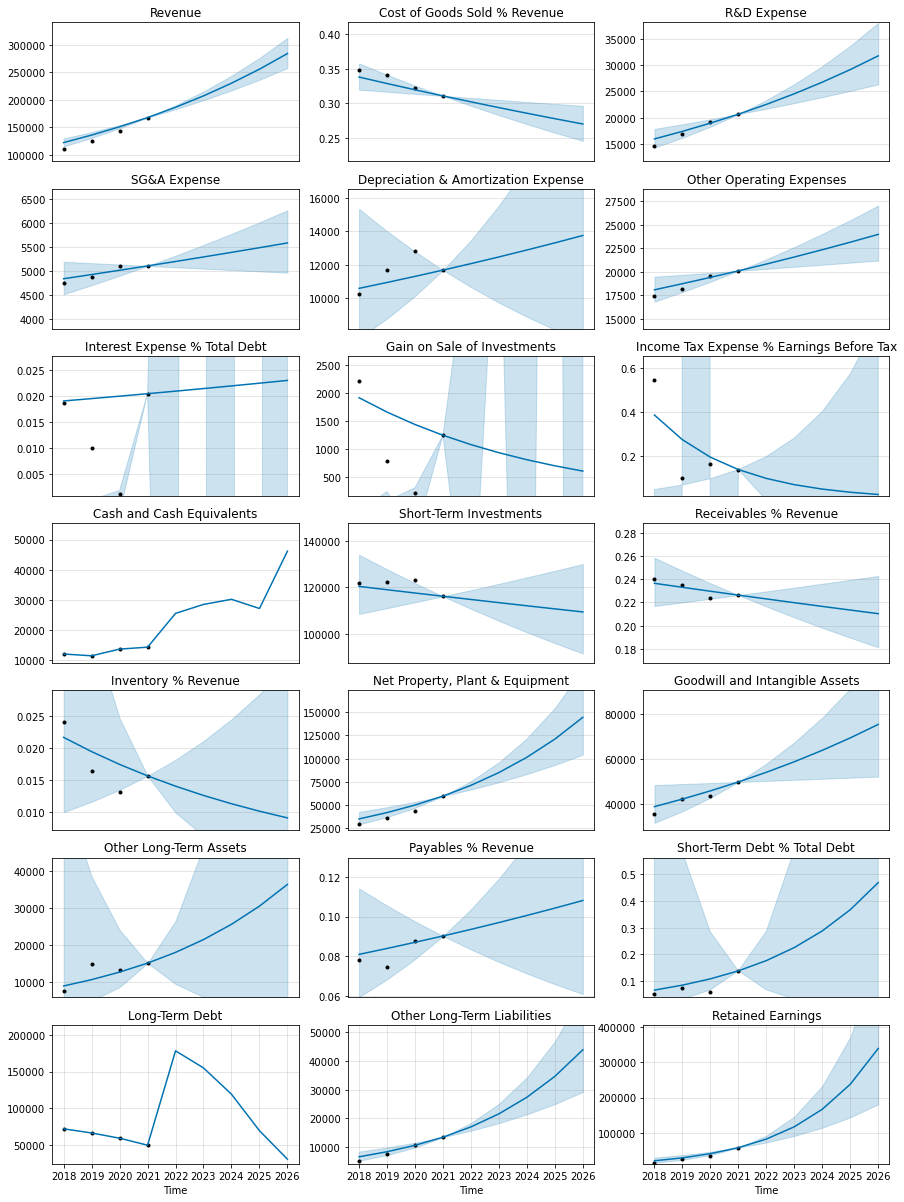

In [17]:
frcst.plot()

In [18]:
market_cap =  data.get_quote_yahoo(ticker)['marketCap'][0]
stock = yf.Ticker(ticker)
shares_outstanding = stock.info['sharesOutstanding']
enterprise_value = stock.info['enterpriseValue'] 

data = yf.download(ticker+" SPY", start="2017-01-01", end="2020-08-01", interval="1mo")
prices=data['Close'].reset_index()
prices.drop('Date', inplace=True, axis=1)
prices=prices[['SPY',ticker]]
returns=prices.pct_change()
risk_free= 0.03
erp=0.05
returns['MRP'] = returns['SPY']-risk_free
returns=returns.dropna()
X = sm.add_constant(returns['MRP'])
y = returns[ticker]
model = sm.OLS(y, X)
results = model.fit()
beta = results.params['MRP']
print('beta:', beta)
cost_of_equity = risk_free+erp*beta

total_debt=stmts.total_debt[3]
tax_rate=stmts.effective_tax_rate[3]
#cost of debt= interest expense/total_debt
cost_of_debt=stmts.int_exp/total_debt
weight_of_equity=market_cap/(market_cap+total_debt)
weight_of_debt=total_debt/(market_cap+total_debt)

WACC = ((cost_of_equity*weight_of_equity)+cost_of_debt*(1-tax_rate)*weight_of_debt)
print('The WACC is',WACC[0]*100 )


[*********************100%***********************]  2 of 2 completed
beta: 0.8260108621292084
The WACC is 7.130054173554984


C:\Users\Omar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
ev_ebit=enterprise_value/stmts.ebit[3]
terminal_value=frcst.ebit[3]*ev_ebit

li=(frcst.fcf[1],frcst.fcf[2], frcst.fcf[3]+terminal_value)

ev = npf.npv(WACC[0],li)
print('The Enterprise Value is',ev)


The Enterprise Value is 2988569023330.9453


In [20]:
equaity_value=(ev)+(stmts.cash[3])-(stmts.total_debt[3])
eq_share=equaity_value/shares_outstanding
print('The fair price is','$'+str(eq_share))

The fair price is $400.7258169213967
